<a href="https://colab.research.google.com/github/jkitchin/dft-book-espresso/blob/master/01-intro-to-ase.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a> Right click to open in new tab.

Author: John Kitchin

Date: March 22, 2020

# Introduction to the Atomic Simulation Environment

The goal of this notebook is to introduce you to the Atomic Simulation Environment (ASE) and how to make a molecule in it. We will explore a few properties of the molecule geometry that you can access through ASE. This is the first step in setting up a DFT calculation. We will nor run a DFT calculation today. That will happen in the next notebook.

# Setup
Start by installing ASE and a visualization tool. This is specific to running in Colab. If you have your own Jupyter notebook and compute server, you do not need to do this.

In [6]:
!pip install ase

# Getting started making molecules from scratch

We start by making a CO molecule and visualizing it. ASE is an object-oriented interface, so we define the geometry as a set of objects. The main object is an `Atoms` object. It consistes of a list of `Atom` objects that define the type and position of each atom. Finally, we define the unit cell, here as a cube of with lengths (a, b, c) where those are each 10 angstroms long.

In [7]:
from ase import Atoms, Atom
from ase.visualize import view

# define an Atoms object
atoms = Atoms([Atom('C', [0., 0., 0.]),
               Atom('O', [1.1, 0., 0.])],
              cell=(10, 10, 10))
atoms

Atoms(symbols='CO', pbc=False, cell=[10.0, 10.0, 10.0])

In [8]:
print('V = {0:1.0f} Angstrom^3'.format(atoms.get_volume()))

V = 1000 Angstrom^3


We should take a look at our geometry. Colab does not support most the visualization tools ase provides. This is one approach to show a figure with the unit cell. You can see here that the atoms are at the corner of the unit cell.

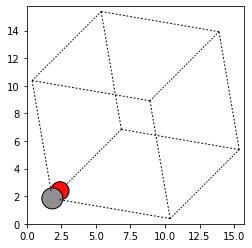

In [14]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation='45x,45y,45z')

It is usually preferrable that the atoms are in the middle of the unit cell. We can define a face-centered cubic unit cell, and center the atoms in the middle of it.

In [17]:
b = 7.1
atoms = Atoms([Atom('C', [0., 0., 0.]),
               Atom('O', [1.1, 0., 0.])],
              cell=[[b, b, 0.],
                    [b, 0., b],
                    [0., b, b]])

atoms.center()  # translate atoms to center of unit cell
atoms

Atoms(symbols='CO', pbc=False, cell=[[7.1, 7.1, 0.0], [7.1, 0.0, 7.1], [0.0, 7.1, 7.1]])

In the next figure you can see the atoms are in the unit cell.  There is some interactivity that is lost with Colab; with the ase viewer you can rotate this around to see it from different angles.

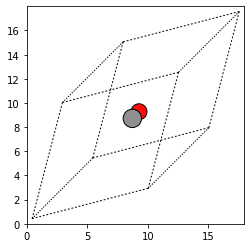

In [18]:
fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation='45x,45y,45z')

We can get the length of the unit cell vectors. Note it is not obvious what these are from the unit cell, but it is easy to calculate them.

In [19]:
import numpy as np

# get unit cell vectors and their lengths
(a1, a2, a3) = atoms.get_cell()
print(f'|a1| = {np.linalg.norm(a1):1.2f} Ang')
print(f'|a2| = {np.linalg.norm(a2):1.2f} Ang')
print(f'|a3| = {np.linalg.norm(a3):1.2f} Ang')

|a1| = 10.04 Ang
|a2| = 10.04 Ang
|a3| = 10.04 Ang


In [21]:
# If you prefer a vectorized solution, we get the norm along the rows.
np.linalg.norm(atoms.get_cell(), axis=0)

array([10.04091629, 10.04091629, 10.04091629])

# Reading other data formats into a calculation
ase.io.read supports many different file formats (https://wiki.fysik.dtu.dk/ase/ase/io/io.html#ase.io.read):

    Known formats:

    =========================  ===========
    format                     short name
    =========================  ===========
    GPAW restart-file          gpw
    Dacapo netCDF output file  dacapo
    Old ASE netCDF trajectory  nc
    Virtual Nano Lab file      vnl
    ASE pickle trajectory      traj
    ASE bundle trajectory      bundle
    GPAW text output           gpaw-text
    CUBE file                  cube
    XCrySDen Structure File    xsf
    Dacapo text output         dacapo-text
    XYZ-file                   xyz
    VASP POSCAR/CONTCAR file   vasp
    VASP OUTCAR file           vasp_out
    SIESTA STRUCT file         struct_out
    ABINIT input file          abinit
    V_Sim ascii file           v_sim
    Protein Data Bank          pdb
    CIF-file                   cif
    FHI-aims geometry file     aims
    FHI-aims output file       aims_out
    VTK XML Image Data         vti
    VTK XML Structured Grid    vts
    VTK XML Unstructured Grid  vtu
    TURBOMOLE coord file       tmol
    TURBOMOLE gradient file    tmol-gradient
    exciting input             exi
    AtomEye configuration      cfg
    WIEN2k structure file      struct
    DftbPlus input file        dftb
    CASTEP geom file           cell
    CASTEP output file         castep
    CASTEP trajectory file     geom
    ETSF format                etsf.nc
    DFTBPlus GEN format        gen
    CMR db/cmr-file            db
    CMR db/cmr-file            cmr
    LAMMPS dump file           lammps
    Gromacs coordinates        gro
    =========================  ===========

You can read XYZ file format to create ase.Atoms objects. Here is what an XYZ file format might look like. First we download one.

In [22]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/jkitchin/dft-book/master/molecules/isobutane.xyz',
                           'isobutane.xyz')

('isobutane.xyz', <http.client.HTTPMessage at 0x7fa2c97f6278>)

In [28]:
from ase.io import read

atoms = read('isobutane.xyz')
atoms.get_cell()

Cell([0.0, 0.0, 0.0])

Note that if you just read it, there is basically no unit cell defined.

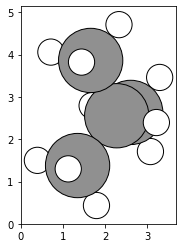

In [26]:
fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation='45x,45y,45z')

We need to define a unit cell. One way to do this is to center the atoms with vacuum surrounding it.

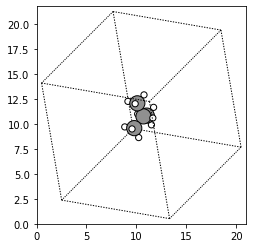

In [27]:
atoms.center(vacuum=5)
fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation='45x,45y,45z')

Now you have an isobutane in the center of the unit cell.

# Predefined molecules
`ase` defines a number of molecular geometries in the `ase.data.molecules` database. For example, the database includes the molecules in the G2/97 database. This database contains a broad set of atoms and molecules for which good experimental data exists, making them useful for benchmarking studies. See this site for the original files.

The coordinates for the atoms in the database are MP2(full)/6-31G(d) optimized geometries. Here is a list of all the species available in `ase.data.g2`. You may be interested in reading about some of the other databases in `ase.data` too.

In [0]:
from ase.data import g2
keys = list(g2.data.keys())
# print in 3 columns
for i in range(len(keys) // 3):
    print('{0:25s}{1:25s}{2:25s}'.format(*tuple(keys[i * 3: i * 3 + 3])))


Be                       BeH                      C                        
C2H2                     C2H4                     C2H6                     
CH                       CH2_s1A1d                CH2_s3B1d                
CH3                      CH3Cl                    CH3OH                    
CH3SH                    CH4                      CN                       
CO                       CO2                      CS                       
Cl                       Cl2                      ClF                      
ClO                      F                        F2                       
H                        H2CO                     H2O                      
H2O2                     HCN                      HCO                      
HCl                      HF                       HOCl                     
Li                       Li2                      LiF                      
LiH                      N                        N2                       
N2H4        

Here is an example of reading one of these.

unit cell: Cell([13.775328, 13.537479, 15.014576])


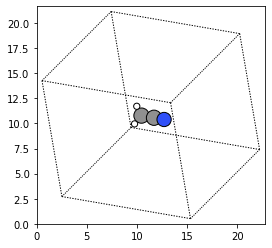

In [31]:
from ase.build import molecule

atoms = molecule('CH3CN')

atoms.center(vacuum=6)
print(f'unit cell: {atoms.get_cell()}')

fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation='45x,45y,45z');

# Combining Atoms objects
It is frequently useful to combine two Atoms objects, e.g. for computing reaction barriers, or other types of interactions. In ase, we simply add two Atoms objects together. Here is an example of getting an ammonia and oxygen molecule in the same unit cell. See Figure fig:combined-atoms. We set the Atoms about three Å apart using the ase.Atoms.translate function.

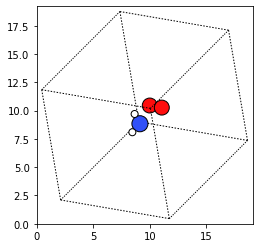

In [33]:
from ase.structure import molecule
from ase.io import write

atoms1 = molecule('NH3')

atoms2 = molecule('O2')
atoms2.translate([3, 0, 0])

bothatoms = atoms1 + atoms2
bothatoms.center(5)

fig, ax = plt.subplots()
plot_atoms(bothatoms, ax, rotation='45x,45y,45z');

# Simple properties
Simple properties do not require a DFT calculation. They are typically only functions of the atom types and geometries.

## Getting cartesian positions
If you want the (x,y,z) coordinates of the atoms, use the ase.Atoms.get_positions. If you are interested in the fractional coordinates, use ase.Atoms.get_scaled_positions.

In [38]:
from ase.structure import molecule

atoms = molecule('C6H6')  # benzene

# We use a dataframe just because it is easy to print in a notebook
data = [[atom.symbol, atom.x, atom.y, atom.z] for atom in atoms]
import pandas as pd
pd.DataFrame(data, columns=['sym', 'p_x', 'p_y', 'p_z'])

,sym,p_x,p_y,p_z
0,C,0.000000,1.395248,0.0
1,C,1.208320,0.697624,0.0
2,C,1.208320,-0.697624,0.0
3,C,0.000000,-1.395248,0.0
4,C,-1.208320,-0.697624,0.0
5,C,-1.208320,0.697624,0.0
6,H,0.000000,2.482360,0.0
7,H,2.149787,1.241180,0.0
8,H,2.149787,-1.241180,0.0
9,H,0.000000,-2.482360,0.0


In [0]:
# Here is a more old-fashioned way to print the properties
# get all properties in arrays
sym = atoms.get_chemical_symbols()
pos = atoms.get_positions()
num = atoms.get_atomic_numbers()

atom_indices = range(len(atoms))

print()
print('  # sym    at#    p_x     p_y     p_z')
print('-------------------------------------')
for i, s, n, p in zip(atom_indices, sym, num, pos):
    px, py, pz = p
    print(f'{i:3d}{s:>3s}{n:8d}{px:-8.2f}{py:-8.2f}{pz:-8.2f}')


  # sym    at#    p_x     p_y     p_z
-------------------------------------
  0  C       6    0.00    1.40    0.00
  1  C       6    1.21    0.70    0.00
  2  C       6    1.21   -0.70    0.00
  3  C       6    0.00   -1.40    0.00
  4  C       6   -1.21   -0.70    0.00
  5  C       6   -1.21    0.70    0.00
  6  H       1    0.00    2.48    0.00
  7  H       1    2.15    1.24    0.00
  8  H       1    2.15   -1.24    0.00
  9  H       1    0.00   -2.48    0.00
 10  H       1   -2.15   -1.24    0.00
 11  H       1   -2.15    1.24    0.00


## Molecular weight and molecular formula
molecular weight We can quickly compute the molecular weight of a molecule with this recipe. We use ase.Atoms.get_masses to get an array of the atomic masses of each atom in the Atoms object, and then just sum them up.

Note that the argument reduce=True for ase.Atoms.get_chemical_formula collects all the symbols to provide a molecular formula.

In [40]:
atoms = molecule('C6H6')
masses = atoms.get_masses()

molecular_weight = masses.sum()
molecular_formula = atoms.get_chemical_formula(mode='reduce')

# note use of two lines to keep length of line reasonable
s = f'The molecular weight of {molecular_formula} is {molecular_weight:1.2f} gm/mol.'
print(s)

The molecular weight of C6H6 is 78.11 gm/mol.


center of mass The center of mass (COM) is defined as:

COM = $\frac{\sum m_i \cdot r_i}{m_i}$

The center of mass is essentially the average position of the atoms, weighted by the mass of each atom. Here is an example of getting the center of mass from an Atoms object using `ase.Atoms.get_center_of_mass`. Here we show three ways to compute this quantity.

In [41]:
# ammonia
atoms = molecule('NH3')

# cartesian coordinates
print(f'COM1 = {atoms.get_center_of_mass()}')

# compute the center of mass by hand
pos = atoms.positions
masses = atoms.get_masses()

COM = np.array([0., 0., 0.])
for m, p in zip(masses, pos):
    COM += m*p
COM /= masses.sum()

print(f'COM2 = {COM}'.format(COM))

# one-line linear algebra definition of COM
print(f'COM3 = {np.dot(masses, pos) / np.sum(masses)}')

COM1 = [0.00000000e+00 5.91861899e-08 4.75435401e-02]
COM2 = [0.00000000e+00 5.91861899e-08 4.75435401e-02]
COM3 = [0.00000000e+00 5.91861899e-08 4.75435401e-02]


## Moments of inertia
The moment of inertia is a measure of resistance to changes in rotation. It is defined by 
$I=\sum_{i=1}^N m_i r_i^2$ where $r_i$ is the distance to an axis of rotation. There are typically three moments of inertia, although some may be zero depending on symmetry, and others may be degenerate. There is a convenient function to get the moments of inertia: `ase.Atoms.get_moments_of_inertia`. Here are several examples of molecules with different types of symmetry.:

In [0]:
from ase.structure import molecule

print('linear rotors: I = [0 Ia Ia]')
atoms = molecule('CO2')
print('  CO2 moments of inertia: {}'.format(atoms.get_moments_of_inertia()))
print('')

print('symmetric rotors (Ia = Ib) < Ic')
atoms = molecule('NH3')
print('  NH3 moments of inertia: {}'.format(atoms.get_moments_of_inertia()))

atoms = molecule('C6H6')
print('  C6H6 moments of inertia: {}'.format(atoms.get_moments_of_inertia()))
print('')

print('symmetric rotors Ia < (Ib = Ic)')
atoms = molecule('CH3Cl')
print('CH3Cl moments of inertia: {}'.format(atoms.get_moments_of_inertia()))
print('')

print('spherical rotors Ia = Ib = Ic')
atoms = molecule('CH4')
print('  CH4 moments of inertia: {}'.format(atoms.get_moments_of_inertia()))
print('')

print('unsymmetric rotors Ia != Ib != Ic')
atoms = molecule('C3H7Cl')
print('  C3H7Cl moments of inertia: {}'.format(atoms.get_moments_of_inertia()))

linear rotors: I = [0 Ia Ia]
  CO2 moments of inertia: [ 0.         44.45273132 44.45273132]

symmetric rotors (Ia = Ib) < Ic
  NH3 moments of inertia: [1.71022353 1.71022474 2.67047664]
  C6H6 moments of inertia: [ 88.78025559  88.78027717 177.56053276]

symmetric rotors Ia < (Ib = Ic)
CH3Cl moments of inertia: [ 3.2039126  37.969823   37.96982492]

spherical rotors Ia = Ib = Ic
  CH4 moments of inertia: [3.19164619 3.19164619 3.19164619]

unsymmetric rotors Ia != Ib != Ic
  C3H7Cl moments of inertia: [ 19.41420447 213.18480664 223.1578698 ]


If you want to know the principle axes of rotation, we simply pass `vectors=True` to the function, and it returns the moments of inertia and the principle axes.

In [0]:
atoms = molecule('CH3Cl')
moments, axes = atoms.get_moments_of_inertia(vectors=True)
print('Moments = {0}'.format(moments))
print('axes = {0}'.format(axes))

Moments = [ 3.2039126  37.969823   37.96982492]
axes = [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


This shows the first moment is about the z-axis, the second moment is about the y-axis, and the third moment is about the x-axis.

## Computing bond lengths and angles
A typical question we might ask is, "What is the structure of a molecule?" In other words, what are the bond lengths, angles between bonds, and similar properties. The Atoms object contains an `ase.Atoms.get_distance` method to make this easy. To calculate the distance between two atoms, you have to specify their indices, remembering that the index starts at 0.

In [0]:
# ammonia
atoms = molecule('NH3')

print('atom symbol')
print('===========')
for i, atom in enumerate(atoms):
    print('{0:2d} {1:3s}' .format(i, atom.symbol))

# N-H bond length
s = 'The N-H distance is {0:1.3f} angstroms'
print(s.format(atoms.get_distance(0, 1)))

atom symbol
 0 N  
 1 H  
 2 H  
 3 H  
The N-H distance is 1.017 angstroms


Bond angles are a little trickier. If we had vectors describing the directions between two atoms, we could use some simple trigonometry to compute the angle between the vectors: $\vec{a} \cdot \vec{b} = |\vec{a}||\vec{b}| \cos(\theta)$.  So we can calculate the angle as $\theta = \arccos\left(\frac{\vec{a} \cdot \vec{b}}{|\vec{a}||\vec{b}|}\right)$, we just have to define our two vectors $\vec{a}$ and $\vec{b}$. We compute these vectors as the difference in positions of two atoms. For example, here we compute the angle H-N-H in an ammonia molecule. This is the angle between N-H$_1$ and N-H$_2$. In the next example, we utilize functions in mod:numpy to perform the calculations, specifically the `numpy.arccos` function, the `numpy.dot` function, and `numpy.linalg.norm` functions.

In [0]:
from ase.structure import molecule

# ammonia
atoms = molecule('NH3')

print('atom symbol')
print('===========')
for i, atom in enumerate(atoms):
    print('{0:2d} {1:3s}'.format(i, atom.symbol))

a = atoms.positions[0] - atoms.positions[1]
b = atoms.positions[0] - atoms.positions[2]

from numpy import arccos, dot, pi
from numpy.linalg import norm

theta_rad = arccos(dot(a, b) / (norm(a) * norm(b)))  # in radians

print('theta = {0:1.1f} degrees'.format(theta_rad * 180./pi))

atom symbol
 0 N  
 1 H  
 2 H  
 3 H  
theta = 106.3 degrees


Alternatively you could use `ase.Atoms.get_angle`. Note we want the angle between atoms with indices [1, 0, 2] to get the H-N-H angle.

In [0]:
from ase.structure import molecule
from numpy import pi
# ammonia
atoms = molecule('NH3')

print('theta = {0} degrees'.format(atoms.get_angle(1, 0, 2) ))

theta = 106.33462423179175 degrees


## Dihedral angles
There is support in ase for computing dihedral angles. Let us illustrate that for ethane. We will compute the dihedral angle between atoms 5, 1, 0, and 4. That is a H-C-C-H dihedral angle, and one can visually see (although not here) that these atoms have a dihedral angle of 60°.

In [0]:
from ase.structure import molecule
import numpy as np

atoms = molecule('C2H6')

print('atom symbol')
print('===========')
for i, atom in enumerate(atoms):
  print('{0:2d} {1:3s}'.format(i, atom.symbol))

da = atoms.get_dihedral(5, 1, 0, 4)
print('dihedral angle = {0:1.2f} degrees'.format(da))

atom symbol
 0 C  
 1 C  
 2 H  
 3 H  
 4 H  
 5 H  
 6 H  
 7 H  
dihedral angle = 60.00 degrees


# Wrapping up

That is about all we can do without running a DFT calculation. See https://wiki.fysik.dtu.dk/ase/ase/atoms.html for more examples of what you can do with an Atoms object, including https://wiki.fysik.dtu.dk/ase/ase/atoms.html#list-of-all-methods which describes all the functions on Atoms object. We will see a lot more in the upcoming lectures.

We focused only on molecules here. Later we will see examples of making bulk and surface geometries. Before that though, we will introduce several ideas needed for running DFT calculations.